In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd gdrive/My\ Drive/Colab Notebooks/TrafficSign

/content/gdrive/My Drive/Colab Notebooks/TrafficSign


In [3]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [4]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2
 

Using TensorFlow backend.


In [0]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
 
%matplotlib inline
np.random.seed(0)

In [0]:
# TODO: Fill this in based on where you saved the training and testing data

#training_file = 'german-traffic-signs/train.p'
#validation_file='german-traffic-signs/valid.p'
#testing_file = 'german-traffic-signs/test.p'




# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

In [8]:
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
 
#already 4 dimensional
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [0]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


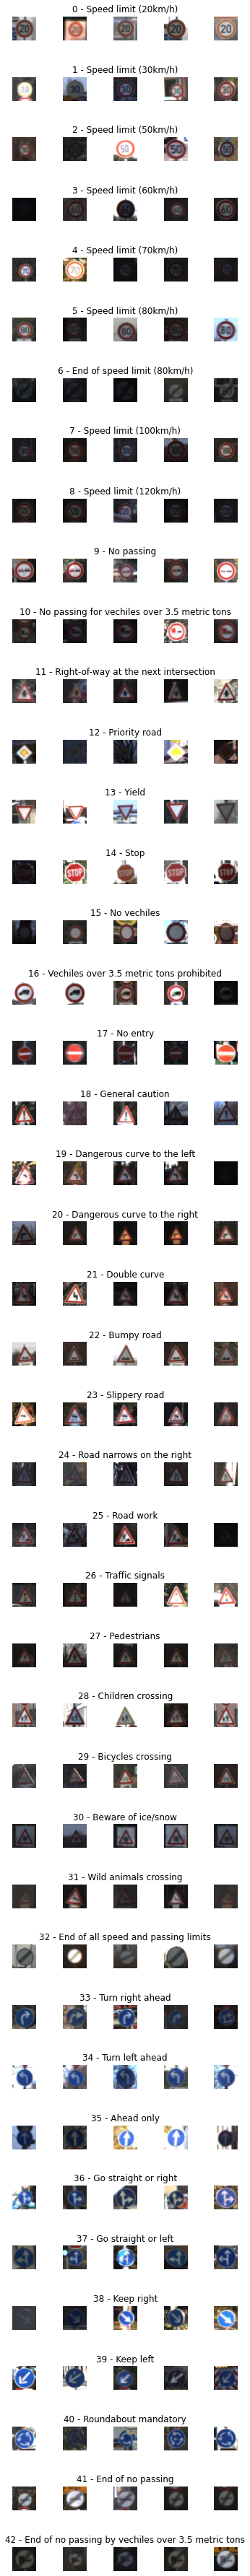

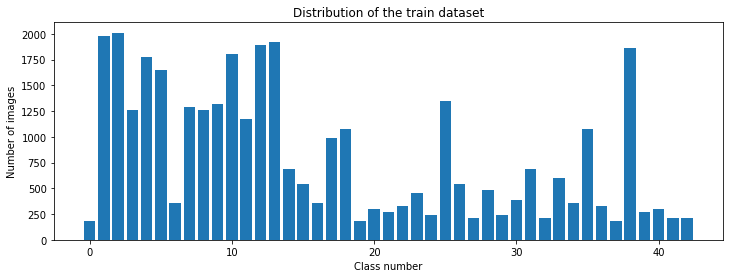

In [10]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
  
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))
      
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [11]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_val.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1000].shape

# TODO: How many unique classes/labels there are in the dataset.
#from the signnames.csv 
n_classes =43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


(32, 32, 3)
36


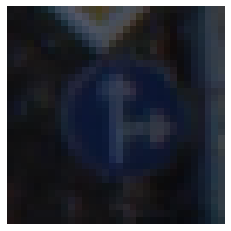

In [12]:
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  return img


(32, 32)


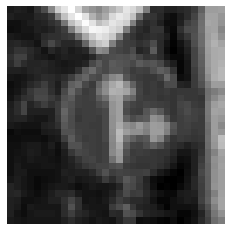

In [13]:
img = grayscale(X_train[1000])
plt.imshow(img,cmap='gray')
plt.axis("off")
print(img.shape)

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

(32, 32)


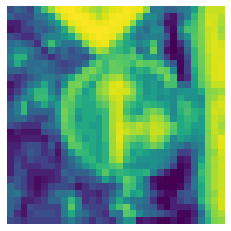

In [14]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [0]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img



In [0]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

(34799, 32, 32)


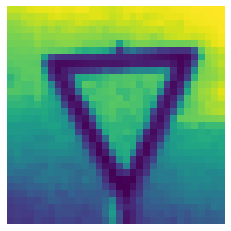

In [17]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)



In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

(15, 32, 32, 1)


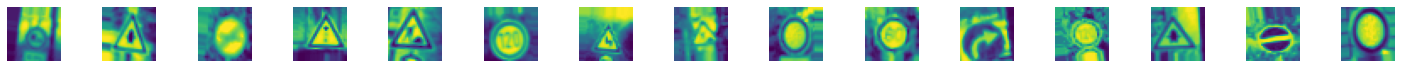

In [19]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)
# for X_batch, y_batch in
 
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis("off")
 
print(X_batch.shape)

In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
# create model
 
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [22]:
model = modified_model()
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
______________________________________

In [23]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='traffic.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min', period=1)

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=20,
                            validation_data=(X_val, y_val), shuffle = 1)
model.save('traffic.h5')


Epoch 1/20
2000/2000 [==============================] - 62s 31ms/step - loss: 0.9465 - accuracy: 0.7240 - val_loss: 0.0965 - val_accuracy: 0.9732
Epoch 2/20
2000/2000 [==============================] - 61s 30ms/step - loss: 0.2194 - accuracy: 0.9326 - val_loss: 0.0696 - val_accuracy: 0.9789
Epoch 3/20
2000/2000 [==============================] - 61s 30ms/step - loss: 0.1401 - accuracy: 0.9568 - val_loss: 0.1073 - val_accuracy: 0.9796
Epoch 4/20
2000/2000 [==============================] - 63s 31ms/step - loss: 0.1144 - accuracy: 0.9649 - val_loss: 0.0431 - val_accuracy: 0.9837
Epoch 5/20
2000/2000 [==============================] - 62s 31ms/step - loss: 0.0944 - accuracy: 0.9713 - val_loss: 0.1172 - val_accuracy: 0.9812
Epoch 6/20
2000/2000 [==============================] - 63s 31ms/step - loss: 0.0802 - accuracy: 0.9754 - val_loss: 0.0675 - val_accuracy: 0.9878
Epoch 7/20
2000/2000 [==============================] - 61s 31ms/step - loss: 0.0728 - accuracy: 0.9781 - val_loss: 0.1043 

In [0]:
from keras.models import load_model
model=load_model('traffic.h5')

Text(0.5, 0, 'epoch')

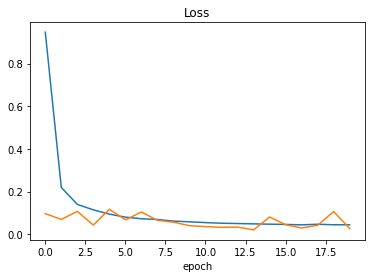

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

Text(0.5, 0, 'epoch')

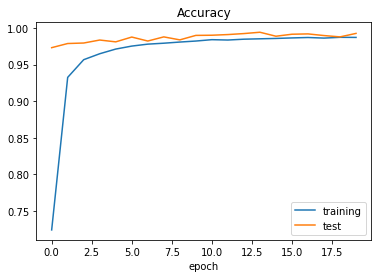

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')
 

In [53]:
# TODO: Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.12637092206193393
Test accuracy: 0.9737133979797363


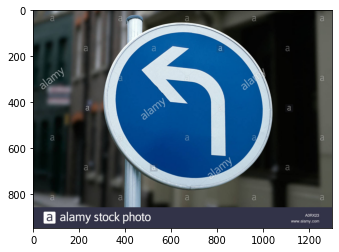

In [54]:
#Testing new images
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


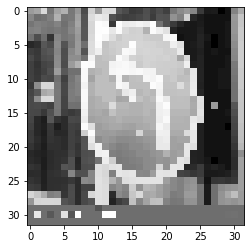

In [55]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img1 = img.reshape(1, 32, 32, 1)

In [56]:
print("predicted sign: "+ str(model.predict_classes(img1)))

predicted sign: [34]


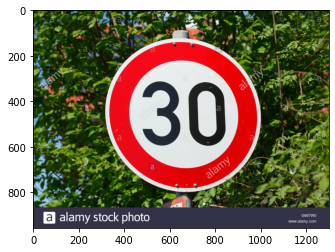

In [57]:
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


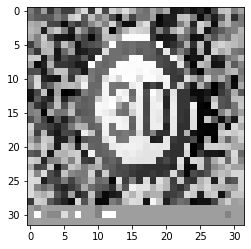

In [58]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img2 = img.reshape(1, 32, 32, 1)

In [59]:
print("predicted sign: "+ str(model.predict_classes(img2)))

predicted sign: [1]


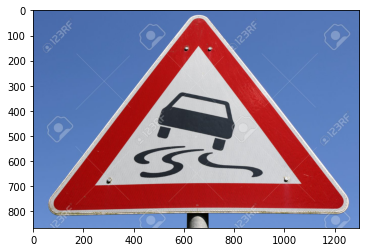

In [60]:
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


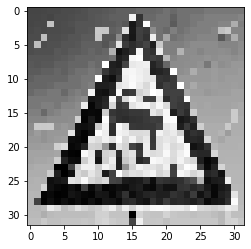

In [61]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img3 = img.reshape(1, 32, 32, 1)

In [62]:
print("predicted sign: "+ str(model.predict_classes(img3)))

predicted sign: [23]


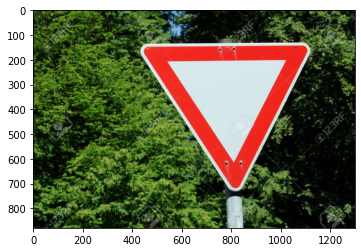

In [63]:
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


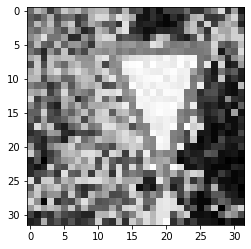

In [64]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img4 = img.reshape(1, 32, 32, 1)

In [65]:
print("predicted sign: "+ str(model.predict_classes(img4)))

predicted sign: [13]


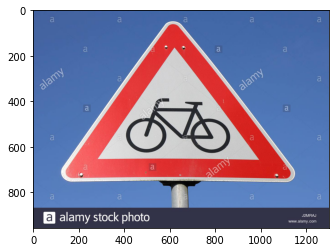

In [66]:
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


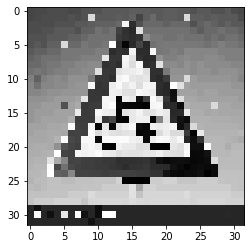

In [67]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img5 = img.reshape(1, 32, 32, 1)

In [68]:
print("predicted sign: "+ str(model.predict_classes(img5)))

predicted sign: [29]


In [0]:
#All 5 predictions are acuurate(100% accuracy for these 5 images)

In [0]:
#Let's output Top 5 Softmax Probabilities For Each Image Found on the Web

In [0]:
prob1 = model.predict(img1)[0]
prob2 = model.predict(img2)[0]
prob3 = model.predict(img3)[0]
prob4 = model.predict(img4)[0]
prob5 = model.predict(img5)[0]

In [0]:
#pip install tensorflow==1.15

In [72]:
import tensorflow as tf
sess = tf.Session()

result1=sess.run(tf.nn.top_k(prob1, k=5))
result2=sess.run(tf.nn.top_k(prob2, k=5))
result3=sess.run(tf.nn.top_k(prob3, k=5))
result4=sess.run(tf.nn.top_k(prob4, k=5))
result5=sess.run(tf.nn.top_k(prob5, k=5))

print('Top 5 softmax probabilities of imag1 are: ',result1.values)
print('Top 5 softmax probabilities of imag1 are: ',result2.values)
print('Top 5 softmax probabilities of imag1 are: ',result3.values)
print('Top 5 softmax probabilities of imag1 are: ',result4.values)
print('Top 5 softmax probabilities of imag1 are: ',result5.values)

Top 5 softmax probabilities of imag1 are:  [9.744509e-01 1.789298e-02 5.325369e-03 1.516402e-03 5.202094e-04]
Top 5 softmax probabilities of imag1 are:  [9.9999523e-01 4.7153135e-06 1.4311459e-08 6.8975176e-10 1.9309242e-10]
Top 5 softmax probabilities of imag1 are:  [9.9999344e-01 6.5031809e-06 5.3416538e-13 8.4344841e-16 1.8802072e-17]
Top 5 softmax probabilities of imag1 are:  [9.9999928e-01 5.7353964e-07 5.7968112e-08 1.0898140e-08 5.1705400e-09]
Top 5 softmax probabilities of imag1 are:  [9.9956566e-01 2.2046539e-04 1.4425405e-04 5.7654561e-05 1.1891282e-05]


In [73]:
print('Top 5 softmax predictions of imag1 are: ',result1.indices)
print('Top 5 softmax predictions of imag1 are: ',result2.indices)
print('Top 5 softmax predictions of imag1 are: ',result3.indices)
print('Top 5 softmax predictions of imag1 are: ',result4.indices)
print('Top 5 softmax predictions of imag1 are: ',result5.indices)

Top 5 softmax predictions of imag1 are:  [34 38 40 12 35]
Top 5 softmax predictions of imag1 are:  [1 2 5 7 4]
Top 5 softmax predictions of imag1 are:  [23 29 31 22 28]
Top 5 softmax predictions of imag1 are:  [13 25  5 38 34]
Top 5 softmax predictions of imag1 are:  [29 28 30 24 23]
